<a href="https://colab.research.google.com/github/jpineda714/CIENCIA_DATOS_2025/blob/main/EDA_Tarea_Johan_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis exploratorio de datos

Pasos EDA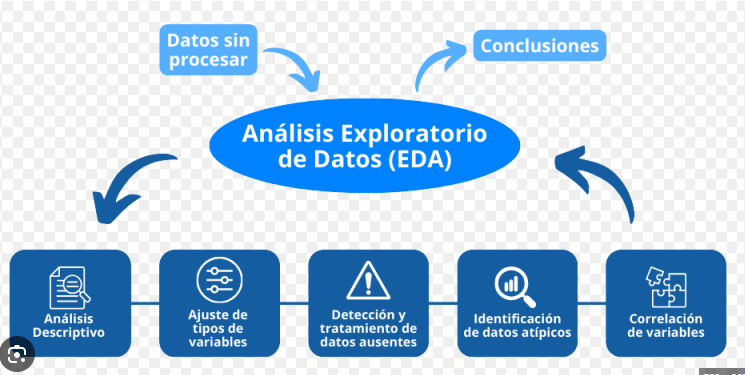

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Titanic.csv')


In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



* PassengerId: numero identidentificación del pasajero
* Survived: numero binario 1 sobrevivio 0 murio   
*  Pclass:Clase de tiquete que tenia el pasajero (1,2,3)
*  Name: Nombre del pasajero
*  Sex: Genero  Male/Female
*  Age: Edad
*  SibSp: Numero de Hermanos o esposas en el barco
*  Parch: Numero de padres o hijos
*  Ticket: Id del tiquete
*  Fare: Valor del tiquete
*  Cabin: Numero de la habitación
*  Embarked: Port of Embarkation:C = Cherbourg, Q = Queenstown, S = Southampton





In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
def bar_char(feature):
  survived=df[df['Survived']==1][feature].value_counts()
  dead=df[df['Survived']==0][feature].value_counts()
  df_feat=pd.DataFrame([survived,dead])
  test=pd.DataFrame([survived,dead])
  test.index=["sobrevivientes","Fallecidos"]
  test.plot(kind="bar",stacked=True,figsize=(10,5))

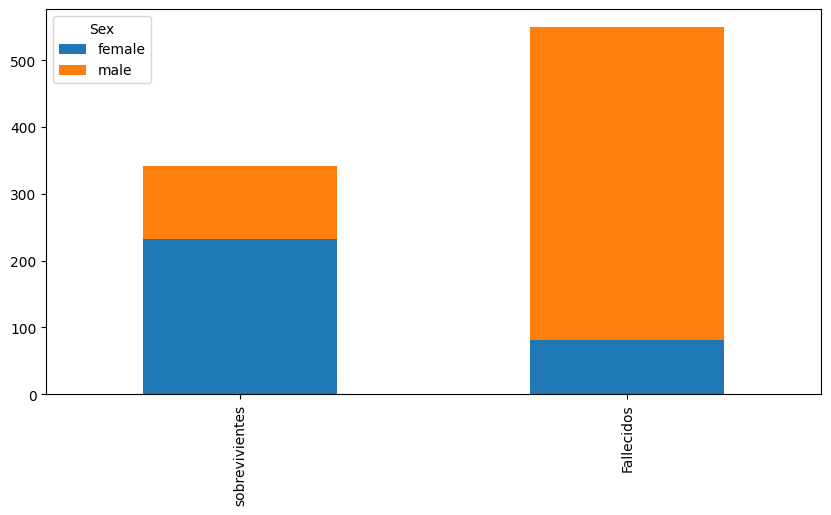

In [ ]:
bar_char("Sex")

La grafica señala que las mujeres tuvieron mayor probabilidad de supervivencia

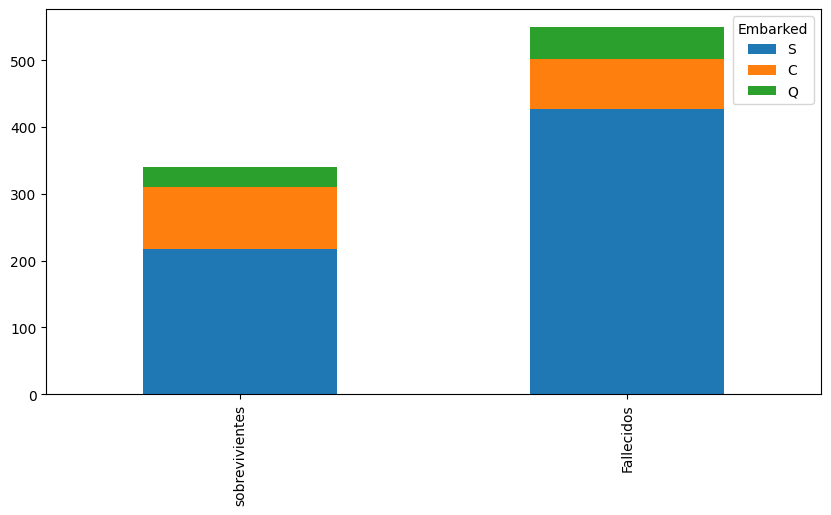

In [5]:
bar_char("Embarked")

La grafica señala que los pasajeros que embarcaron en S tiene peor tasa de supervivencia, mientras que Q tuvo la mejor posibilidad de sobrevivir

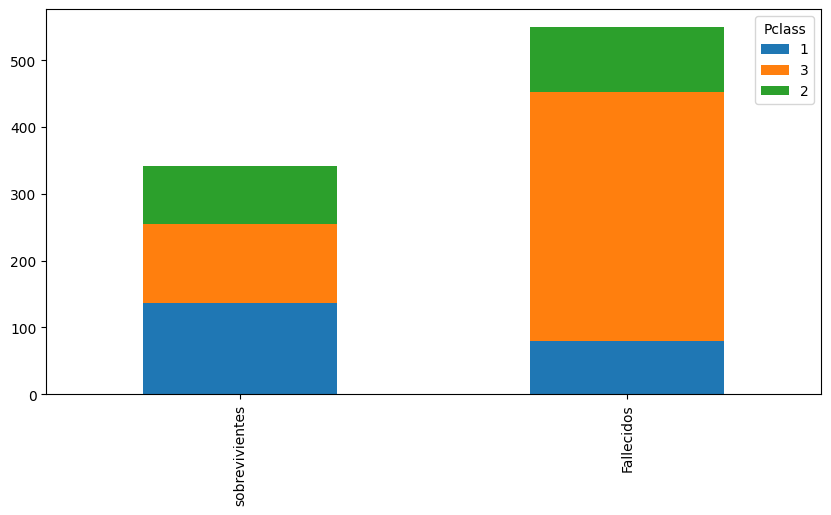

In [6]:
bar_char("Pclass")

PClass1 tiene mayor probabilidad de sobrevivir con respecto a pclass3

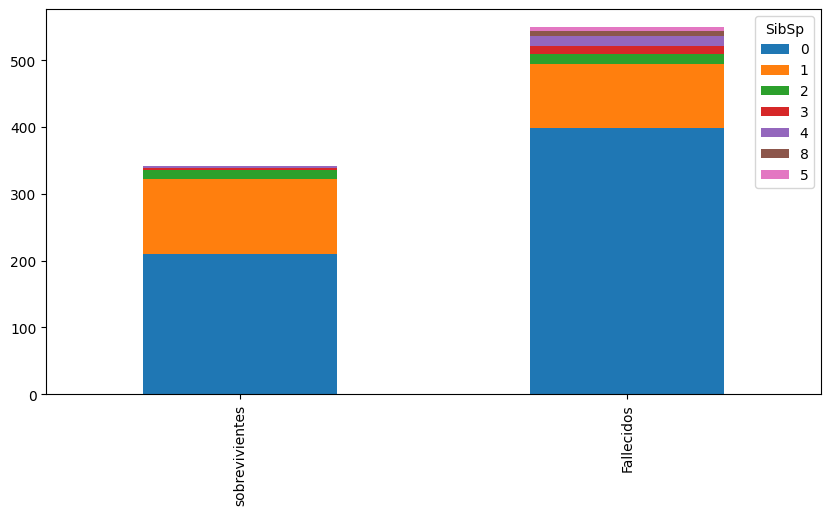

In [7]:
bar_char("SibSp")

Las personas solteras presentan una menor probabilidad de sobrevivr que las que tenian un hermano o esposa

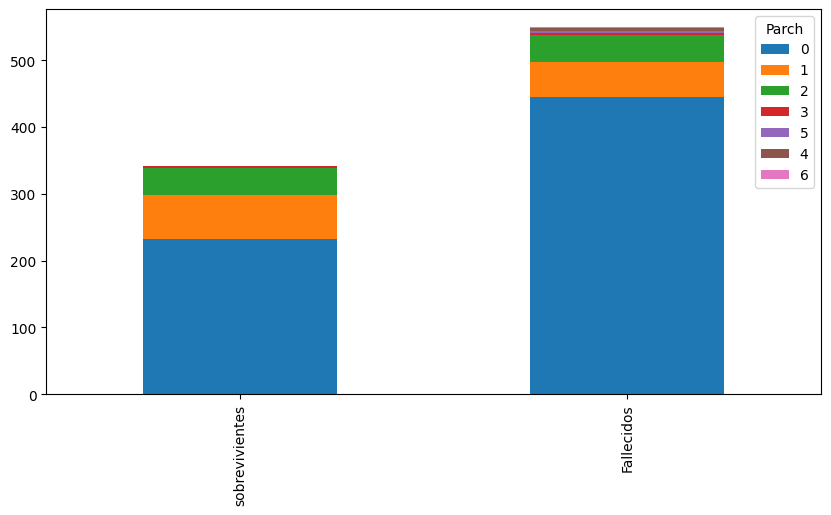

In [8]:
bar_char("Parch")

La grafica muestra que la probabilidad de sobrevivir aumentaba si tenia 1 hasta 3 hijos, disminuia si tenia 0 o mas de 3 hijos

#Ingenieria de Caracteristicas
Esl proceso de usar el dominio del conocimiento para crear nuevas caracteristicas (feature vector) que logre que los algoritmos de machine learning funcionen adecuadamente.

In [9]:
def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)
  return titles

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1131372151.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)


In [10]:
df["Title"]=extract_title(df)

In [11]:
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


### creando un mapeo de titulos

Para ello reemplazamos titulos de la siguiente manera

* Mr=0
* Miss=1
* Mrs=2
* Otros=3

In [12]:
def replace_titles(data):
  title_mapping={"Mr":0,"Miss":1, "Mrs":2}
  data["Title"]=data["Title"].map(title_mapping).fillna(3)
  return data

In [13]:
replace_titles(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.0


In [14]:
df[["Name","Title"]].head()

,Name,Title
0,"Braund, Mr. Owen Harris",0.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2.0
2,"Heikkinen, Miss. Laina",1.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2.0
4,"Allen, Mr. William Henry",0.0


## Reparando la edad


In [15]:
title_age_means=df.groupby("Title")["Age"].mean()
title_age_means

,Age
Title,
0.0,32.368090
1.0,21.773973
2.0,35.898148
3.0,20.430161


In [16]:
df["Age"]=df.apply(lambda row: title_age_means[row["Title"]] if pd.isnull(row["Age"]) else row["Age"],axis=1)


In [17]:
df[["Title","Age"]].head(10)

,Title,Age
0,0.0,22.00000
1,2.0,38.00000
2,1.0,26.00000
3,2.0,35.00000
4,0.0,35.00000
5,0.0,32.36809
6,0.0,54.00000
7,3.0,2.00000
8,2.0,27.00000
9,2.0,14.00000


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


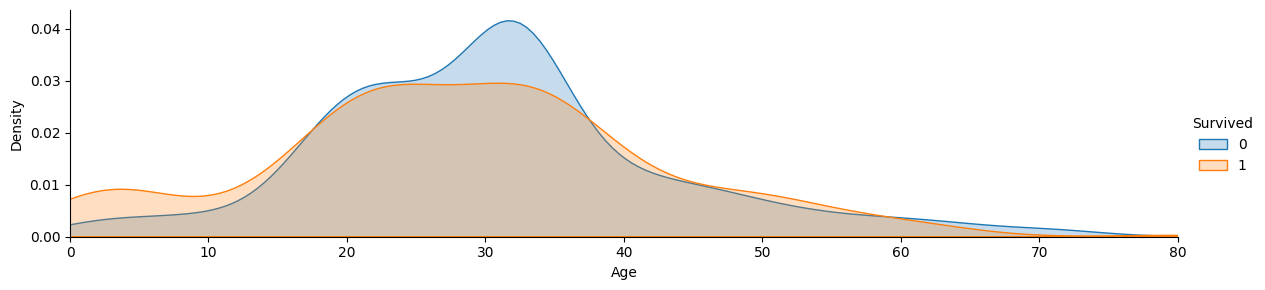

In [18]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


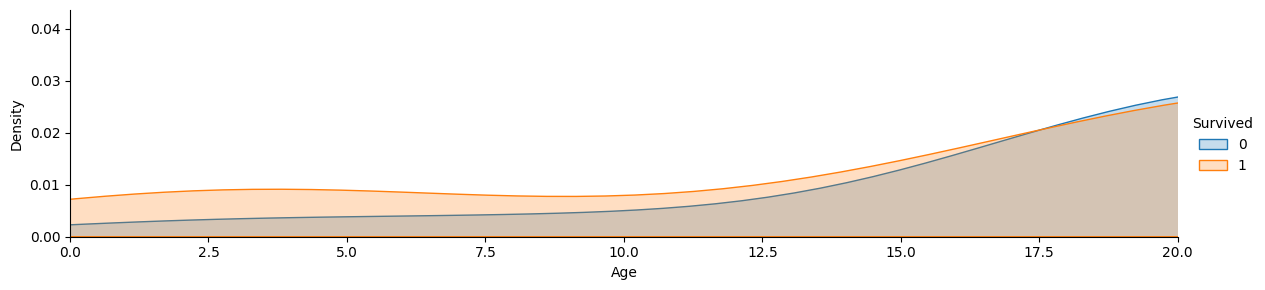

In [19]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()

#Tarea
 Hacer el  analisis que se hizo con titles ahora con fare

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


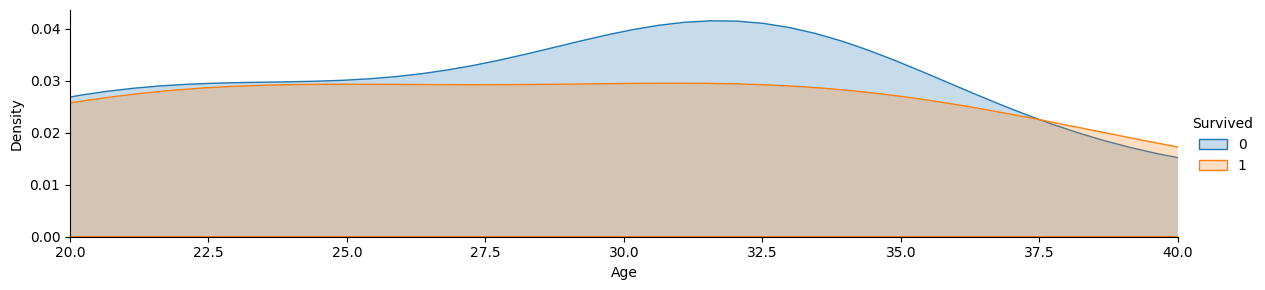

In [20]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(20,40)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


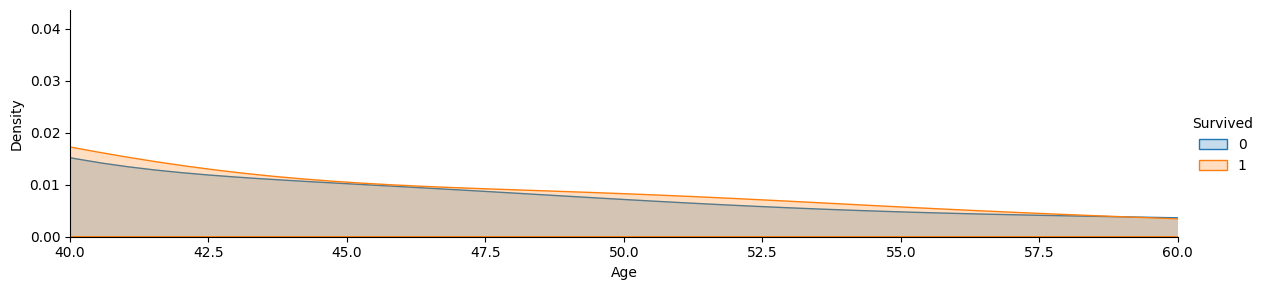

In [21]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(40,60)
plt.show()

Binning

Convertir una variable numerica a categorica, en este caso edad mapear


* niños:0
* joven:1
* adulto:2
* edad madura:3
* Edad Avanzada:4

In [22]:
df["Age_category"]=pd.cut(df["Age"], bins=[0,16,26,36,62,float("inf")],labels=[0,1,2,3,4],right=False)

In [23]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,2.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,2.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,0.0,2
5,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,NaN,Q,0.0,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,0.0,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S,3.0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S,2.0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,NaN,C,2.0,0


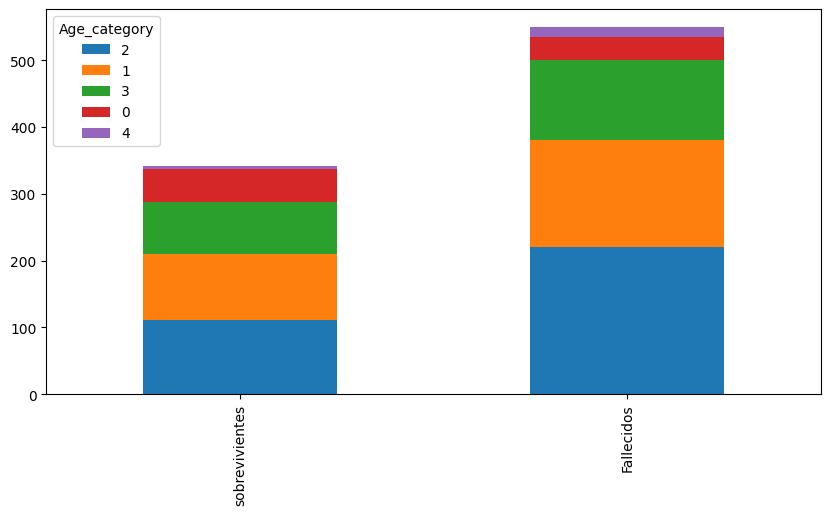

In [24]:
bar_char("Age_category")

Hacer esto con Fare, analizar los rangos con embarque, crear una nueva fearute y dependiendo del embarque pueden salir nuevas cositas